## 다층 퍼셉트론으로 손글씨 분류하기

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()

In [5]:
print(digits.images[0].shape)

(8, 8)


In [6]:
print(digits.target[0])

0


In [10]:
print("전체 샘플의 수 : {}".format(len(digits.images)))

전체 샘플의 수 : 1797


In [12]:
images_and_labels = list(zip(digits.images, digits.target))

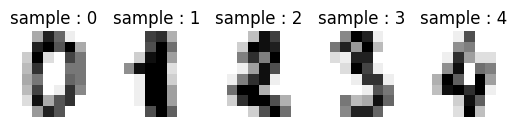

In [23]:
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'sample : {label}')

In [24]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [27]:
#  8 × 8 행렬을 전부 64차원의 벡터로 변환
print(digits.data[0])
print(digits.data[0].shape)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(64,)


In [28]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

#### 다층 퍼셉트론 분류기 만들기

In [31]:
import torch
import torch.nn as nn
from torch import optim 

In [32]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(), 
    nn.Linear(32, 16), 
    nn.ReLU(), 
    nn.Linear(16, 10)
)

In [41]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

/tmp/ipykernel_150/3759151177.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
/tmp/ipykernel_150/3759151177.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.int64)


In [42]:
loss_fn = nn.CrossEntropyLoss() # 소프트 맥스에서 사용하는 비용함수

In [43]:
optimizer = optim.Adam(model.parameters())

In [44]:
losses = []

In [46]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    
    loss = loss_fn(y_pred, Y)
    loss.backward()
    
    optimizer.step()
    
    if epoch % 10 == 0:
            print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.373868
Epoch   10/100 Cost: 2.044374
Epoch   20/100 Cost: 1.740430
Epoch   30/100 Cost: 1.395760
Epoch   40/100 Cost: 1.037891
Epoch   50/100 Cost: 0.721297
Epoch   60/100 Cost: 0.500204
Epoch   70/100 Cost: 0.361582
Epoch   80/100 Cost: 0.274310
Epoch   90/100 Cost: 0.217480


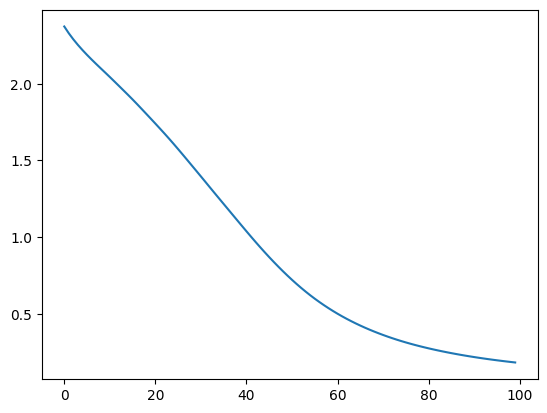

In [48]:
plt.plot(losses)

## 다층 퍼셉트론으로 MNIST 분류하기

#### 데이터 로드하기

In [49]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.datasets import fetch_openml

In [50]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False, parser='auto)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [53]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [54]:
mnist.data[0].shape

(784,)

In [55]:
mnist.target[0]

'5'

In [56]:
mnist.target = mnist.target.astype(np.int8)

In [57]:
X = mnist.data / 255 # 정규화
y = mnist.target 

이 이미지 데이터의 레이블은 5이다.


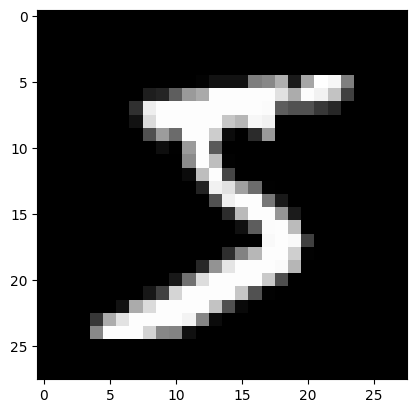

In [63]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {}이다.".format(y[0]))

#### 훈련 데이터와 테스트 데이터의 분리 

In [83]:
import torch 
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

In [85]:
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [86]:
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

In [87]:
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

#### 다층 퍼셉트론

In [88]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [89]:
from torch import optim

# 오차함수 
losss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [90]:
def train(epoch):
    model.train() # 신경망을 학습 모드로 전환 
    
    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행 
    for data, target in loader_train:
        optimizer.zero_grad()
        
        outputs = model(data)
        loss = loss_fn(outputs, target)
        loss.backward()
        optimizer.step()
        
    print('epoch{} : 완료\n'.format(epoch))

In [91]:
def test():
    model.eval() # 신경망을 추론 모드로 전환
    correct = 0
    
    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad(): # 추론 과정에는 미분이 필요없음 
        for data , target in loader_test:
            
            outputs = model(data)
            
            # 추론 계산 
            _, predicted = torch.max(outputs.data, 1) # 확률이 가장 높은 레이블 계산 
            
            correct += predicted.eq(target.data.view_as(predicted)).sum()
            
        
            # 정확도 출력
        data_num = len(loader_test.dataset)  # 데이터 총 건수
        print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                       data_num, 100. * correct / data_num))

In [92]:
test()


테스트 데이터에서 예측 정확도: 843/10000 (8%)



In [93]:
for epoch in range(4):
    train(epoch)

test()

epoch0 : 완료

epoch1 : 완료

epoch2 : 완료

epoch3 : 완료


테스트 데이터에서 예측 정확도: 9618/10000 (96%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


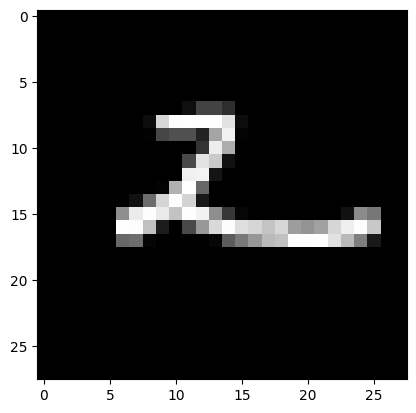

In [109]:
index = 2022

model.eval() # 신경망을 추론 모드로

data = X_test[index]
output = model(data)

_, predicted = torch.max(output.data, 0)

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()

plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))


예측 결과 : 2


이 이미지 데이터의 정답 레이블은 2입니다


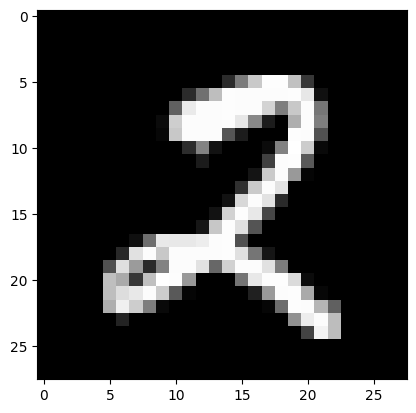